In [3]:
import numpy as np
import bilby
import corner
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

## $e_0 = 0.05$

In [18]:
# TaylorF2Ecck
result_ecck_0p05 = bilby.result.read_in_result("../injection_recover_PE_results/GW190425_Ecck_e0_0p05_data0_1126259642-413_analysis_H1L1_result.hdf5")
chirp_mass1 = result_ecck_0p05.posterior["chirp_mass"].values
mass_ratio1 =  result_ecck_0p05.posterior["mass_ratio"].values

# TaylorF2
result_tf2_0p05 = bilby.result.read_in_result("../injection_recover_PE_results/GW190425_TF2_e0_0p05_data0_1126259642-413_analysis_H1L1_result.hdf5")
chirp_mass2 = result_tf2_0p05.posterior["chirp_mass"].values
mass_ratio2 =  result_tf2_0p05.posterior["mass_ratio"].values

# injected values
chirp_mass_injected = result_ecck_0p05.injection_parameters['chirp_mass']
mass_ratio_injected = result_ecck_0p05.injection_parameters['mass_ratio']

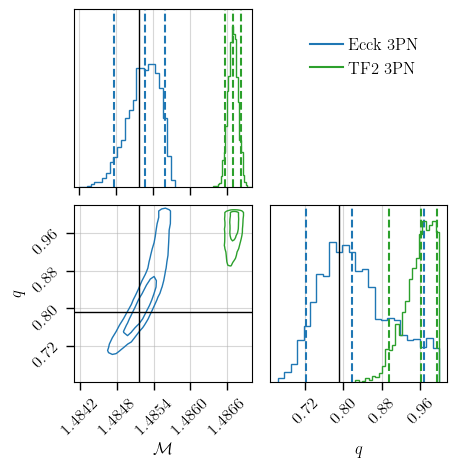

In [24]:
data3 = np.transpose(np.array([chirp_mass1, mass_ratio1]))
data4 = np.transpose(np.array([chirp_mass2, mass_ratio2]))

ndim = 2
# Setup the figure
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12
})
fig, axes = plt.subplots(ndim, ndim, figsize=(5, 5), gridspec_kw={"hspace": 0.1, "wspace": 0.1})

corner.corner(data3, fig=fig,color = 'C0', bins=25, smooth=0.8, plot_datapoints=False, plot_density=False, contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 1}, contour_kwargs={'linewidths': 1}, quantiles=(0.05, 0.5, 0.95))

corner.corner(data4, fig=fig, color='C2', bins=25, smooth=0.8, plot_datapoints=False, plot_density=False, contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 1}, contour_kwargs={'linewidths': 1}, quantiles=(0.05, 0.5, 0.95))

# x-axis labels
size_axis_label = 12
axes[1][0].set_xlabel(r'${\cal M}$', fontsize=size_axis_label)
axes[1][1].set_xlabel(r'$q$', fontsize=size_axis_label, labelpad=12)
# y-axis labels
axes[1][0].set_ylabel(r'$q$', fontsize=size_axis_label)

# injected values
# Loop over the diagonal
value1 = [chirp_mass_injected, mass_ratio_injected]
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(value1[i], color="k", linewidth=1)
# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(value1[xi], color="k", linewidth=1)
        ax.axhline(value1[yi], color="k", linewidth=1)
        ax.plot(value1[xi], value1[yi], "k", linewidth=1)

# add grid
for i in range(2):
    for j in range(2):
        if axes[i, j] is not None:
            axes[i, j].grid(True, which="both", ls="-", alpha=0.5)


# add legend with line colors
blue_line = mlines.Line2D([], [], color='C0', label='Ecck 3PN')
orange_line = mlines.Line2D([], [], color='C2', label='TF2 3PN')
handles = [blue_line, orange_line]
labels = [h.get_label() for h in handles]
fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0., 0.9, 0.9, .0), ncol=1) # Adjust loc and ncol as needed
plt.savefig("injection_recovery_Ecck_vs_TF2_e0_0p05_GW190425.pdf", bbox_inches="tight", dpi=300)
plt.show()